# Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.linear_model
import statsmodels.formula.api as sm

/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read data

In [2]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 2 - Regression/Section 6 - Polynomial Regression/'

In [6]:
df=pd.read_csv(work_dir+'Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


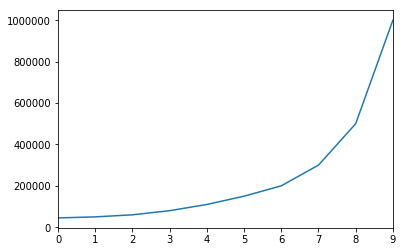

In [5]:
df['Salary'].plot()

In [35]:
X=df.as_matrix(['Level'])
Y=df['Salary'].values
X,Y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

# Clean up missing data

In [15]:
sum(np.isnan(X)),sum(np.isnan(Y))

(array([0]), 0)

In [9]:
# imputer=sklearn.preprocessing.Imputer(missing_values='NaN',strategy='mean',axis=0).fit(X[:,1:3])
# X[:,1:3]=imputer.transform(X[:,1:3])
# X

# Create dummy variables

In [16]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(X[:,3])
# X[:,3]=label_encoder.transform(X[:,3])
# one_hot_encoder=sklearn.preprocessing.OneHotEncoder(categorical_features=[3]).fit(X)
# X=one_hot_encoder.transform(X).toarray()
# X

# Avoid the dummy variable trap

In [18]:
# X=X=np.delete(X,0,1)
# X

# Create categorical labels

In [11]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(Y)
# Y=label_encoder.transform(Y)
# Y

# Feature scaling

In [14]:
# standard_scaler=sklearn.preprocessing.StandardScaler().fit(X)
# X=standard_scaler.transform(X)
# X

# Train/test split

In [36]:
# X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X,Y,test_size=0,random_state=0)
# Y_train.size,Y_test.size

In [37]:
# X_train,Y_train

In [38]:
# X_test,Y_test

# Regression - sklearn.linear_model.LinearRegression()

In [39]:
lin_reg=sklearn.linear_model.LinearRegression().fit(X,Y)
lin_reg.score(X,Y)

0.66904123319298947

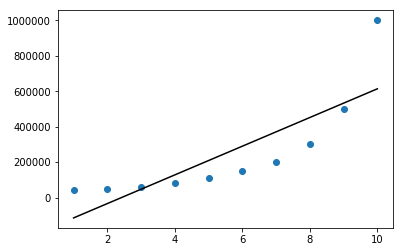

In [43]:
plt.scatter(X,Y)
plt.plot(X,lin_reg.predict(X),color='black')

# Regression - statsmodels.formula.api.OLS

In [47]:
X_ext=np.append(np.ones((X.shape[0],1)),X,1)
lin_reg_OLS=sm.OLS(Y,X_ext).fit()

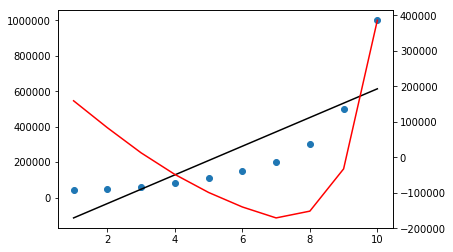

In [63]:
_,ax1=plt.subplots()
ax1.scatter(X,Y)
ax1.plot(X,lin_reg_OLS.predict(X_ext),color='black')
ax2=ax1.twinx()
ax2.plot(X,lin_reg_OLS.resid,color='red')

# Polynomial features, degree 2

## Polynomial feature creation - sklearn.preprocessing.PolynomialFeatures

In [91]:
polynomizer=sklearn.preprocessing.PolynomialFeatures(2)
polynomizer.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [92]:
X_polynomized=polynomizer.transform(X)
X_polynomized

array([[   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.],
       [   1.,   10.,  100.]])

## Backward elimination

In [93]:
p_limit=0.05
be_feat=list(range(X_polynomized.shape[1]))
done=False
while not done:
    be_mult_reg_OLS=sm.OLS(Y,X_polynomized[:,be_feat]).fit()
    p_max=max(be_mult_reg_OLS.pvalues)
    if p_max>p_limit:
        p_max_pos=np.argmax(be_mult_reg_OLS.pvalues)
        print('Removing feature {} (p {:.3f})'.format(be_feat[p_max_pos],p_max))
        be_feat=be_feat[:p_max_pos]+be_feat[p_max_pos+1:]
    else:
        print('Next worst feature is {} (p {:.3f}). Done removing!'.format(be_feat[p_max_pos],p_max))
        done=True
be_mult_reg_OLS.summary()

Removing feature 0 (p 0.085)
Removing feature 1 (p 0.095)
Next worst feature is 2 (p 0.000). Done removing!


/home/ggomarr/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     74.41
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           1.21e-05
Time:                        11:08:13   Log-Likelihood:                -131.48
No. Observations:                  10   AIC:                             265.0
Df Residuals:                       9   BIC:                             265.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7094.1065    822.410      8.626      0.000    5233.686    8954.527
==============================================================================
Omnibus:                       10.760   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.738
Skew:                           1.461   Prob(JB):                       0.0936
Kurtosis:                       4.684   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Forward selection

In [94]:
p_limit=0.05
fs_feat=[]
candidates=list(range(X_polynomized.shape[1]))
done=False
while not done and len(candidates)>0:
    aux_OLS_lst=[sm.OLS(Y,X_polynomized[:,fs_feat+[candidate]]).fit() for candidate in candidates]
    p_vals=[aux_OLS.pvalues[-1] for aux_OLS in aux_OLS_lst]
    p_min=min(p_vals)
    p_min_pos=np.argmin(p_vals)
    if p_min<p_limit:
        print('Adding feature {} (p {:.3f})'.format(candidates[p_min_pos],p_min))
        fs_feat.append(candidates[p_min_pos])
        candidates=candidates[:p_min_pos]+candidates[p_min_pos+1:]
        fs_mult_reg_OLS=aux_OLS_lst[p_min_pos]
    else:
        print('Next best feature is {} (p {:.3f}). Done adding!'.format(candidates[p_min_pos],p_min))
        done=True
fs_mult_reg_OLS.summary()

Adding feature 2 (p 0.000)
Next best feature is 1 (p 0.095). Done adding!


/home/ggomarr/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     74.41
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           1.21e-05
Time:                        11:08:23   Log-Likelihood:                -131.48
No. Observations:                  10   AIC:                             265.0
Df Residuals:                       9   BIC:                             265.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7094.1065    822.410      8.626      0.000    5233.686    8954.527
==============================================================================
Omnibus:                       10.760   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.738
Skew:                           1.461   Prob(JB):                       0.0936
Kurtosis:                       4.684   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking models

In [105]:
be_feat==fs_feat

True

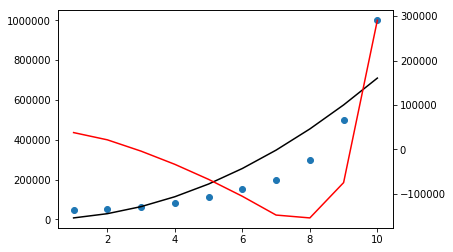

In [106]:
reg_OLS=sm.OLS(Y,X_polynomized[:,be_feat]).fit()
_,ax1=plt.subplots()
ax1.scatter(X,Y)
ax1.plot(X,reg_OLS.predict(X_polynomized[:,be_feat]),color='black')
ax2=ax1.twinx()
ax2.plot(X,reg_OLS.resid,color='red')

# Polynomial features, degree 3

## Polynomial feature creation - sklearn.preprocessing.PolynomialFeatures

In [134]:
polynomizer=sklearn.preprocessing.PolynomialFeatures(3)
polynomizer.fit(X)
X_polynomized=polynomizer.transform(X)

## Backward elimination

In [118]:
p_limit=0.05
be_feat=list(range(X_polynomized.shape[1]))
done=False
while not done:
    be_mult_reg_OLS=sm.OLS(Y,X_polynomized[:,be_feat]).fit()
    p_max=max(be_mult_reg_OLS.pvalues)
    if p_max>p_limit:
        p_max_pos=np.argmax(be_mult_reg_OLS.pvalues)
        print('Removing feature {} (p {:.3f})'.format(be_feat[p_max_pos],p_max))
        be_feat=be_feat[:p_max_pos]+be_feat[p_max_pos+1:]
    else:
        print('Next worst feature is {} (p {:.3f}). Done removing!'.format(be_feat[p_max_pos],p_max))
        done=True
be_mult_reg_OLS.summary()

Removing feature 0 (p 0.260)
Next worst feature is 1 (p 0.009). Done removing!


/home/ggomarr/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     172.6
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           6.35e-07
Time:                        11:19:48   Log-Likelihood:                -121.03
No. Observations:                  10   AIC:                             248.1
Df Residuals:                       7   BIC:                             249.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9.566e+04    2.7e+04      3.545      0.009    3.18e+04    1.59e+05
x2         -3.244e+04   8028.003     -4.041      0.005   -5.14e+04   -1.35e+04
x3          3225.2580    569.062      5.668      0.001    1879.639    4570.877
==============================================================================
Omnibus:                        0.225   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.894   Jarque-Bera (JB):                0.390
Skew:                          -0.167   Prob(JB):                        0.823
Kurtosis:                       2.093   Cond. No.                         762.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Forward selection

In [119]:
p_limit=0.05
fs_feat=[]
candidates=list(range(X_polynomized.shape[1]))
done=False
while not done and len(candidates)>0:
    aux_OLS_lst=[sm.OLS(Y,X_polynomized[:,fs_feat+[candidate]]).fit() for candidate in candidates]
    p_vals=[aux_OLS.pvalues[-1] for aux_OLS in aux_OLS_lst]
    p_min=min(p_vals)
    p_min_pos=np.argmin(p_vals)
    if p_min<p_limit:
        print('Adding feature {} (p {:.3f})'.format(candidates[p_min_pos],p_min))
        fs_feat.append(candidates[p_min_pos])
        candidates=candidates[:p_min_pos]+candidates[p_min_pos+1:]
        fs_mult_reg_OLS=aux_OLS_lst[p_min_pos]
    else:
        print('Next best feature is {} (p {:.3f}). Done adding!'.format(candidates[p_min_pos],p_min))
        done=True
fs_mult_reg_OLS.summary()

Adding feature 3 (p 0.000)
Next best feature is 2 (p 0.156). Done adding!


/home/ggomarr/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     175.8
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           3.27e-07
Time:                        11:19:53   Log-Likelihood:                -127.51
No. Observations:                  10   AIC:                             257.0
Df Residuals:                       9   BIC:                             257.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           828.9683     62.516     13.260      0.000     687.548     970.388
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.215
Skew:                           0.314   Prob(JB):                        0.898
Kurtosis:                       2.652   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking models

In [120]:
be_feat==fs_feat

False

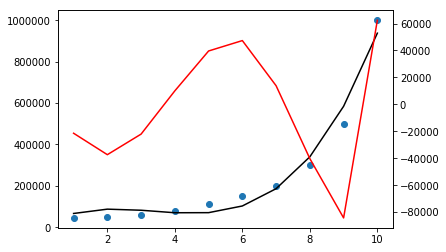

In [121]:
be_reg_OLS=sm.OLS(Y,X_polynomized[:,be_feat]).fit()
_,ax1=plt.subplots()
ax1.scatter(X,Y)
ax1.plot(X,be_reg_OLS.predict(X_polynomized[:,be_feat]),color='black')
ax2=ax1.twinx()
ax2.plot(X,be_reg_OLS.resid,color='red')

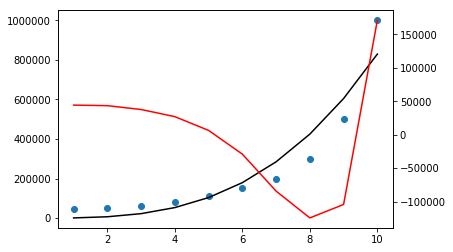

In [122]:
fs_reg_OLS=sm.OLS(Y,X_polynomized[:,fs_feat]).fit()
_,ax1=plt.subplots()
ax1.scatter(X,Y)
ax1.plot(X,fs_reg_OLS.predict(X_polynomized[:,fs_feat]),color='black')
ax2=ax1.twinx()
ax2.plot(X,fs_reg_OLS.resid,color='red')

# Polynomial features, degree 4

## Polynomial feature creation - sklearn.preprocessing.PolynomialFeatures

In [133]:
polynomizer=sklearn.preprocessing.PolynomialFeatures(4)
polynomizer.fit(X)
X_polynomized=polynomizer.transform(X)

## Backward elimination

In [125]:
p_limit=0.05
be_feat=list(range(X_polynomized.shape[1]))
done=False
while not done:
    be_mult_reg_OLS=sm.OLS(Y,X_polynomized[:,be_feat]).fit()
    p_max=max(be_mult_reg_OLS.pvalues)
    if p_max>p_limit:
        p_max_pos=np.argmax(be_mult_reg_OLS.pvalues)
        print('Removing feature {} (p {:.3f})'.format(be_feat[p_max_pos],p_max))
        be_feat=be_feat[:p_max_pos]+be_feat[p_max_pos+1:]
    else:
        print('Next worst feature is {} (p {:.3f}). Done removing!'.format(be_feat[p_max_pos],p_max))
        done=True
be_mult_reg_OLS.summary()

Next worst feature is 0 (p 0.042). Done removing!


/home/ggomarr/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     478.1
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           1.21e-06
Time:                        11:20:47   Log-Likelihood:                -110.01
No. Observations:                  10   AIC:                             230.0
Df Residuals:                       5   BIC:                             231.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.842e+05   6.78e+04      2.718      0.042    9963.382    3.58e+05
x1          -2.11e+05   7.64e+04     -2.762      0.040   -4.07e+05   -1.47e+04
x2          9.477e+04   2.65e+04      3.582      0.016    2.68e+04    1.63e+05
x3         -1.546e+04   3534.989     -4.374      0.007   -2.46e+04   -6376.309
x4           890.1515    159.803      5.570      0.003     479.364    1300.939
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.767
Skew:                          -0.529   Prob(JB):                        0.681
Kurtosis:                       2.149   Cond. No.                     6.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Forward selection

In [126]:
p_limit=0.05
fs_feat=[]
candidates=list(range(X_polynomized.shape[1]))
done=False
while not done and len(candidates)>0:
    aux_OLS_lst=[sm.OLS(Y,X_polynomized[:,fs_feat+[candidate]]).fit() for candidate in candidates]
    p_vals=[aux_OLS.pvalues[-1] for aux_OLS in aux_OLS_lst]
    p_min=min(p_vals)
    p_min_pos=np.argmin(p_vals)
    if p_min<p_limit:
        print('Adding feature {} (p {:.3f})'.format(candidates[p_min_pos],p_min))
        fs_feat.append(candidates[p_min_pos])
        candidates=candidates[:p_min_pos]+candidates[p_min_pos+1:]
        fs_mult_reg_OLS=aux_OLS_lst[p_min_pos]
    else:
        print('Next best feature is {} (p {:.3f}). Done adding!'.format(candidates[p_min_pos],p_min))
        done=True
fs_mult_reg_OLS.summary()

Adding feature 4 (p 0.000)
Next best feature is 0 (p 0.265). Done adding!


/home/ggomarr/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     335.3
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           1.97e-08
Time:                        11:20:48   Log-Likelihood:                -124.40
No. Observations:                  10   AIC:                             250.8
Df Residuals:                       9   BIC:                             251.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            91.0911      4.975     18.311      0.000      79.838     102.345
==============================================================================
Omnibus:                        2.797   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.613
Skew:                          -0.952   Prob(JB):                        0.447
Kurtosis:                       2.507   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking models

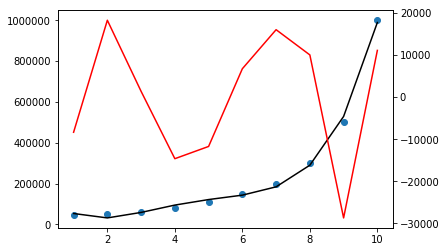

In [128]:
be_reg_OLS=sm.OLS(Y,X_polynomized[:,be_feat]).fit()
_,ax1=plt.subplots()
ax1.scatter(X,Y)
ax1.plot(X,be_reg_OLS.predict(X_polynomized[:,be_feat]),color='black')
ax2=ax1.twinx()
ax2.plot(X,be_reg_OLS.resid,color='red')

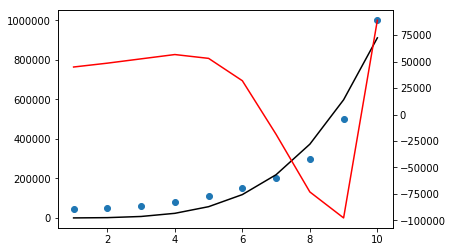

In [129]:
fs_reg_OLS=sm.OLS(Y,X_polynomized[:,fs_feat]).fit()
_,ax1=plt.subplots()
ax1.scatter(X,Y)
ax1.plot(X,fs_reg_OLS.predict(X_polynomized[:,fs_feat]),color='black')
ax2=ax1.twinx()
ax2.plot(X,fs_reg_OLS.resid,color='red')

# Polynomial features, degree 5

## Polynomial feature creation - sklearn.preprocessing.PolynomialFeatures

In [131]:
polynomizer=sklearn.preprocessing.PolynomialFeatures(5)
polynomizer.fit(X)
X_polynomized=polynomizer.transform(X)

## Backward elimination

In [109]:
p_limit=0.05
be_feat=list(range(X_polynomized.shape[1]))
done=False
while not done:
    be_mult_reg_OLS=sm.OLS(Y,X_polynomized[:,be_feat]).fit()
    p_max=max(be_mult_reg_OLS.pvalues)
    if p_max>p_limit:
        p_max_pos=np.argmax(be_mult_reg_OLS.pvalues)
        print('Removing feature {} (p {:.3f})'.format(be_feat[p_max_pos],p_max))
        be_feat=be_feat[:p_max_pos]+be_feat[p_max_pos+1:]
    else:
        print('Next worst feature is {} (p {:.3f}). Done removing!'.format(be_feat[p_max_pos],p_max))
        done=True
be_mult_reg_OLS.summary()

Removing feature 0 (p 0.349)
Next worst feature is 1 (p 0.001). Done removing!


/home/ggomarr/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6810.
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           1.42e-09
Time:                        11:16:43   Log-Likelihood:                -98.486
No. Observations:                  10   AIC:                             207.0
Df Residuals:                       5   BIC:                             208.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9.948e+04   1.23e+04      8.117      0.000     6.8e+04    1.31e+05
x2         -7.084e+04   9879.611     -7.170      0.001   -9.62e+04   -4.54e+04
x3          2.198e+04   2741.097      8.018      0.000    1.49e+04     2.9e+04
x4         -2862.0063    312.944     -9.145      0.000   -3666.455   -2057.558
x5           137.2854     12.577     10.916      0.000     104.956     169.615
==============================================================================
Omnibus:                        0.758   Durbin-Watson:                   2.741
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.058
Skew:                           0.184   Prob(JB):                        0.972
Kurtosis:                       2.942   Cond. No.                     3.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Forward selection

In [110]:
p_limit=0.05
fs_feat=[]
candidates=list(range(X_polynomized.shape[1]))
done=False
while not done and len(candidates)>0:
    aux_OLS_lst=[sm.OLS(Y,X_polynomized[:,fs_feat+[candidate]]).fit() for candidate in candidates]
    p_vals=[aux_OLS.pvalues[-1] for aux_OLS in aux_OLS_lst]
    p_min=min(p_vals)
    p_min_pos=np.argmin(p_vals)
    if p_min<p_limit:
        print('Adding feature {} (p {:.3f})'.format(candidates[p_min_pos],p_min))
        fs_feat.append(candidates[p_min_pos])
        candidates=candidates[:p_min_pos]+candidates[p_min_pos+1:]
        fs_mult_reg_OLS=aux_OLS_lst[p_min_pos]
    else:
        print('Next best feature is {} (p {:.3f}). Done adding!'.format(candidates[p_min_pos],p_min))
        done=True
fs_mult_reg_OLS.summary()

Adding feature 5 (p 0.000)
Adding feature 0 (p 0.010)
Next best feature is 4 (p 0.116). Done adding!


/home/ggomarr/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     471.5
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           2.13e-08
Time:                        11:16:48   Log-Likelihood:                -119.29
No. Observations:                  10   AIC:                             242.6
Df Residuals:                       8   BIC:                             243.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.8891      0.409     21.714      0.000       7.945       9.833
const       5.321e+04   1.58e+04      3.365      0.010    1.67e+04    8.97e+04
==============================================================================
Omnibus:                        2.000   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                0.700
Skew:                          -0.648   Prob(JB):                        0.705
Kurtosis:                       2.968   Cond. No.                     4.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking models

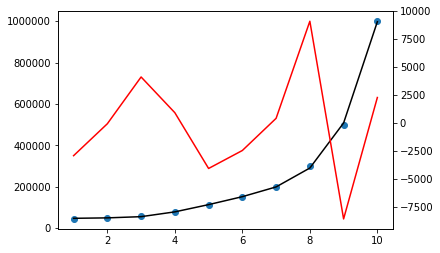

In [114]:
be_reg_OLS=sm.OLS(Y,X_polynomized[:,be_feat]).fit()
_,ax1=plt.subplots()
ax1.scatter(X,Y)
ax1.plot(X,be_reg_OLS.predict(X_polynomized[:,be_feat]),color='black')
ax2=ax1.twinx()
ax2.plot(X,be_reg_OLS.resid,color='red')

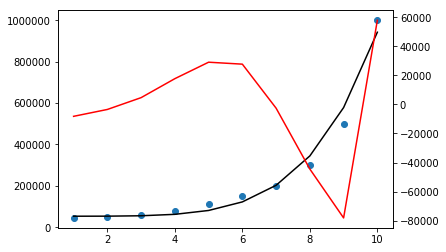

In [115]:
fs_reg_OLS=sm.OLS(Y,X_polynomized[:,fs_feat]).fit()
_,ax1=plt.subplots()
ax1.scatter(X,Y)
ax1.plot(X,fs_reg_OLS.predict(X_polynomized[:,fs_feat]),color='black')
ax2=ax1.twinx()
ax2.plot(X,fs_reg_OLS.resid,color='red')